In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import IntProgress

from code.bp import *
from code.mcmc import *
from code.lattice import *

from multiprocessing import Pool

%load_ext autoreload
%autoreload 2

# Detecting Phase Transitions

In [24]:
h, w = 100, 100

J = 0.5
B = 0 * np.zeros((h, w))

n_steps = 500

In [ ]:
lattices = []
energies = []
magnetizations = []

f = IntProgress(min=0, max=len(temperatures))
display.display(f)
for temperature in temperatures:
    lattice = create_spin_lattice(h, w)

    for i in range(n_steps):
        step_all(lattice, J, B, 1/temperature)
    
    lattices.append(lattice)
    magnetizations.append(magnetization(lattice))
    energies.append(energy(lattice, J, 1/temperature))
    
    f.value += 1

IntProgress(value=0, max=199)

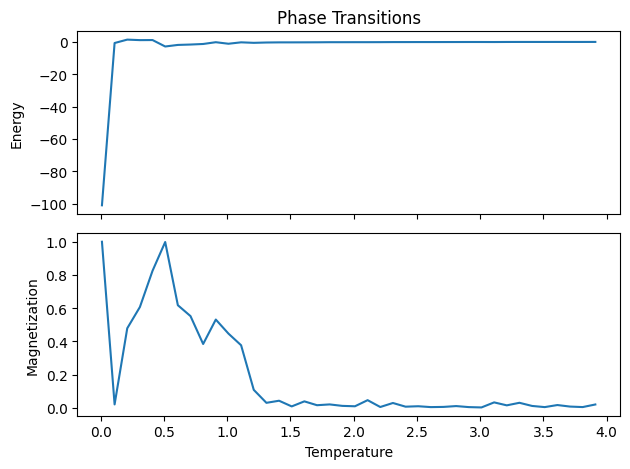

In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

ax0.plot(energies, color='black')
ax0.set_ylabel('Energy', fontsize=16)

ax1.plot(magnetizations, color='black')
ax1.set_ylabel('Magnetization', fontsize=16)

plt.xlabel('Step', fontsize=16)
plt.tight_layout()

#plt.savefig('graphics/report_mcmc_zero_measurables.png')

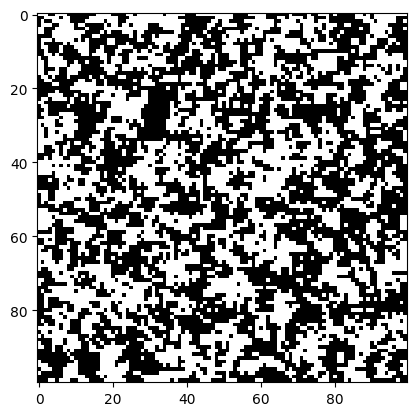

In [23]:
plt.imshow(lattices[16], 'binary', vmin=0, vmax=1)